# **Feature Engineering**

## Objectives

* Create new features to improve model predictions.
* Transform and combine existing features.
* Explore the relationships between features and the target variable.

## Inputs

* Cleaned dataset: `outputs/datasets/collection/HousePricesRecords.csv`
* Data with handled missing values and correct data types.

## Outputs

* New dataset with engineered features: `outputs/datasets/feature_engineered/HousePricesFeatures.csv`
* Visualizations (if applicable): Charts showing feature relationships and distributions.


___

# Change working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/Heritage-Housing-Issues/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/Heritage-Housing-Issues'

___

## Load data

In [10]:
import pandas as pd
from feature_engine.encoding import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from feature_engine.selection import SmartCorrelatedSelection
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("outputs/datasets/collection/HousePricesCleaned.csv")
print(df[['2ndFlrSF', 'BedroomAbvGr', 'SalePrice']].head())

   2ndFlrSF  BedroomAbvGr  SalePrice
0  1.291464      0.137500   0.553334
1 -0.762109      0.137500   0.094270
2  1.320320      0.137500   0.808369
3 -0.762109      0.137500  -0.611328
4 -0.762109      1.471143   1.258931


In [7]:
df.dtypes

1stFlrSF        float64
2ndFlrSF        float64
BedroomAbvGr    float64
BsmtExposure     object
BsmtFinSF1      float64
BsmtFinType1     object
BsmtUnfSF       float64
GarageArea      float64
GarageFinish     object
GarageYrBlt     float64
GrLivArea       float64
KitchenQual      object
LotArea         float64
LotFrontage     float64
MasVnrArea      float64
OpenPorchSF     float64
OverallCond     float64
OverallQual     float64
TotalBsmtSF     float64
YearBuilt       float64
YearRemodAdd    float64
SalePrice       float64
dtype: object

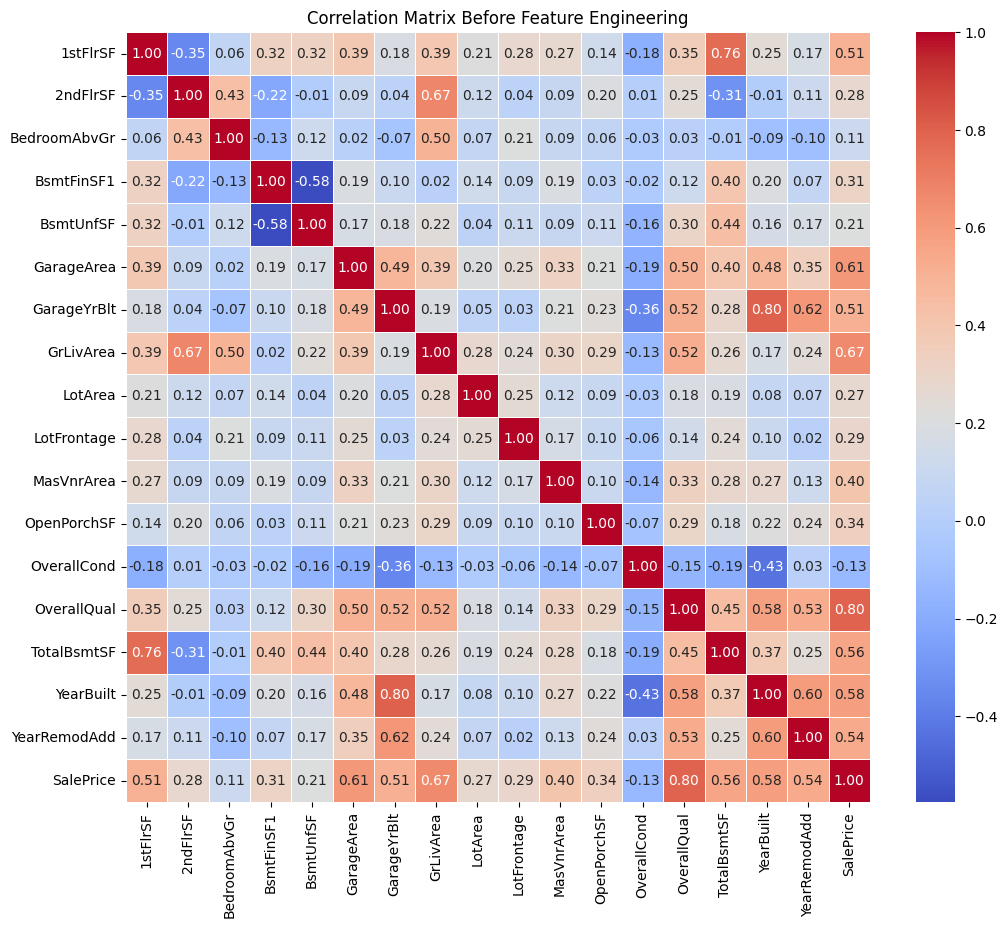

In [31]:
# Show the correlation matrix before feature engineering
correlation_matrix_before = df.select_dtypes(include=['float64', 'int64']).corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_before, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Before Feature Engineering")
plt.show()

**Correlation Matrix Before Feature Engineering**

The correlation matrix helps see how features relate to the target "SalePrice" before starting the feature engineering process. This helps decide which features are important and which can be combined or removed to make the model better.

Key Insights:

* **GrLivArea (0.67)** and **OverallQual (0.80)** have strong positive correalation to "SalePrice" making them important. New features could be created based on these to better capture house value.
* **GarageArea (0.61)** and **YearBuilt (0.58)** also show strong correlations, indicating that larger garages and newer construction add value.
* **BedroomAbvGr (0.11)** and **OverallCond (-0.13)** have weak links to "SalePrice". These may be improved, combined, or removed.

___

In [36]:
# Identify and OneHotEncode categorical variables
one_hot_encoder = OneHotEncoder(variables=['KitchenQual', 'GarageFinish', 'BsmtExposure', 'BsmtFinType1'])
df_encoded = one_hot_encoder.fit_transform(df)

# Select only numeric columns
df_numeric = df_encoded.select_dtypes(include=['float64', 'int64'])

# Generate the correlation matrix
correlation_matrix = df_numeric.corr()

In [53]:
# Filter correlations above a threshold
threshold = 0.5
high_corr = correlation_matrix['SalePrice'][abs(correlation_matrix['SalePrice']) > threshold]
print("Variables with high correlation with SalePrice:")
print(high_corr.sort_values(ascending=False))

Variables with high correlation with SalePrice:
SalePrice         1.000000
OverallQual       0.796281
GrLivArea         0.666410
GarageArea        0.611429
YearBuilt         0.581749
TotalBsmtSF       0.558263
YearRemodAdd      0.537774
GarageYrBlt       0.512484
1stFlrSF          0.507141
KitchenQual_TA   -0.565973
Name: SalePrice, dtype: float64


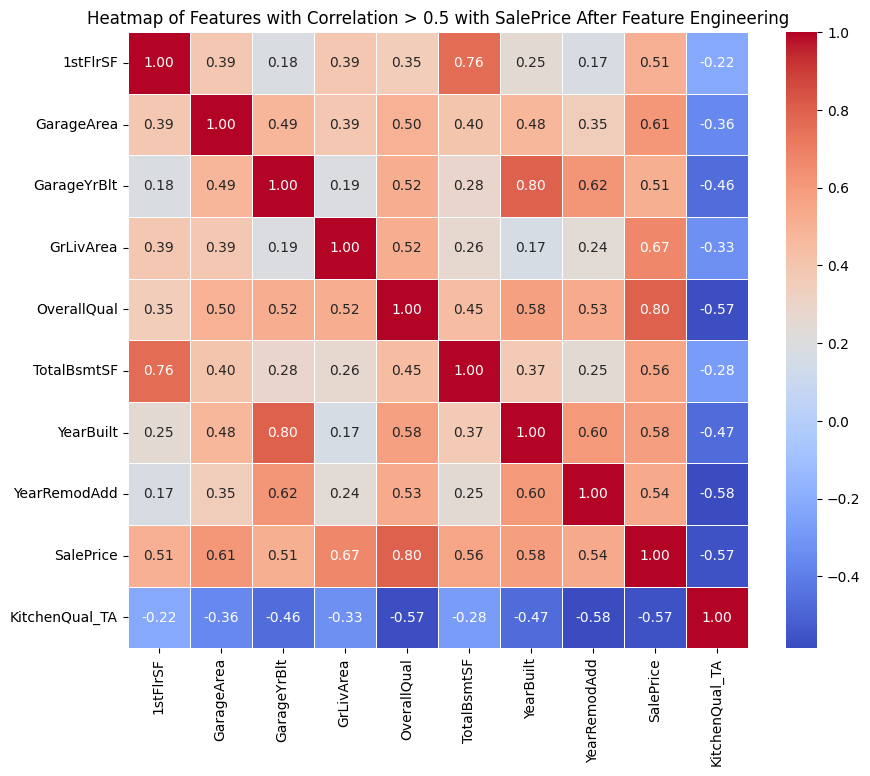

In [55]:
# Generate the correlation matrix after feature engineering
correlation_matrix_after = df.select_dtypes(include=['float64', 'int64']).corr()

# Filter variables with correlation > 0.5 with SalePrice
threshold = 0.5
high_corr = correlation_matrix['SalePrice'][abs(correlation_matrix['SalePrice']) > threshold]

# Get the names of relevant variables
relevant_vars = high_corr.index

# Create a filtered correlation matrix with only these variables
filtered_corr_matrix = correlation_matrix.loc[relevant_vars, relevant_vars]

# Plot heatmap for filtered variables
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap of Features with Correlation > 0.5 with SalePrice After Feature Engineering")
plt.show()


Display correlation matrix, helping identify relationships after feature engineering.

**Correlation Matrix After Feature Engineering**

The updated correlation matrix highlights how features relate to the target variable "SalePrice" after performing feature engineering. This analysis helps determine which features remain important and which newly engineered features contribute to better model predictions.

**Key Insights:**
Strong correlations with SalePrice:

* **OverallQual (0.80)** and **GrLivArea (0.67)** still show strong positive correlations, indicating their continued importance in predicting house prices.

* **GarageArea (0.61)** and **TotalBsmtSF (0.56)** also maintain strong correlations, reinforcing their value in the model.

* **YearBuilt (0.58)** and **YearRemodAdd (0.54)** have similar positive correlations, showing that both features reflect the age and updates of the house, which are important for predicting its price.

**Newly engineered features:**

* None of the newly engineered features surpassed the threshold of 0.5 correlation with SalePrice.

This shows that even though new features were created, the original features are still the best for predicting house prices.

**Weak correlations with SalePrice:**

* **KitchenQual_TA (-0.57)** have weak correlations, indicating the impact on house price may be less significant.

This matrix provides a more refined perspective after feature engineering, allowing for the identification of engineered features that improve the model’s performance and those that could be reconsidered.

___

* **Encode categorical variables:** Turn category columns into numbers so the model can use them.
* **Boolean columns:** Change True/False to 0 and 1 for the model.
* **Separate columns:** Split numeric and category columns to handle them better, like scaling numbers.

In [71]:
# Retain only important numerical columns based on correlation
# None of the categorical columns showed strong correlation with SalePrice (> 0.5).
# Therefore, categorical columns are excluded from further processing.
numerical_columns = ['GarageArea', 'GrLivArea', 'OverallQual']

# Select numerical data
X_numerical = df[numerical_columns]

* Combine columns to put all the numeric and encoded category columns together in one dataset.
* Scale numbers to make all numeric values similar in range to help the model work better.

In [72]:
# Create a pipeline to scale numbers
pipeline = Pipeline([
    ('scaler', StandardScaler())
])


* Scale the numeric features so they are all on a similar range.
* Add 'SalePrice' to the transformed dataset.
* Print the dataset size, first few rows, and data types after transformation.
* Print an error message if something goes wrong.

In [73]:
try:
    # Scale numerical features using the pipeline
    X_numerical_scaled = pd.DataFrame(pipeline.fit_transform(X_numerical), columns=numerical_columns)

    # Include SalePrice in the transformed dataset
    X_numerical_scaled['SalePrice'] = df['SalePrice']

    # Display information about the transformed dataset
    print("Transformed dataset size:", X_numerical_scaled.shape)
    print(X_numerical_scaled.head())
    print(X_numerical_scaled.dtypes)

except Exception as e:
    print("Error during pipeline execution:", e)

Transformed dataset size: (1290, 4)
   GarageArea  GrLivArea  OverallQual  SalePrice
0    0.385419   0.517712     0.735143   0.553334
1   -0.068010  -0.537289    -0.070579   0.094270
2    0.694576   0.696686     0.735143   0.808369
3    0.869764   0.534197     0.735143  -0.611328
4    1.869371   1.666910     1.540864   1.258931
GarageArea     float64
GrLivArea      float64
OverallQual    float64
SalePrice      float64
dtype: object


___

In [74]:
# Print the shape and columns of the DataFrame to verify changes after operations
print("DataFrame shape after operation:", df.shape)
print("DataFrame columns after operation:", df.columns.tolist())

DataFrame shape after operation: (1290, 22)
DataFrame columns after operation: ['1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinType1', 'BsmtUnfSF', 'GarageArea', 'GarageFinish', 'GarageYrBlt', 'GrLivArea', 'KitchenQual', 'LotArea', 'LotFrontage', 'MasVnrArea', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'TotalBsmtSF', 'YearBuilt', 'YearRemodAdd', 'SalePrice']


Create a **heatmap** to visualize the correlation matrix **after** Feature Engineering

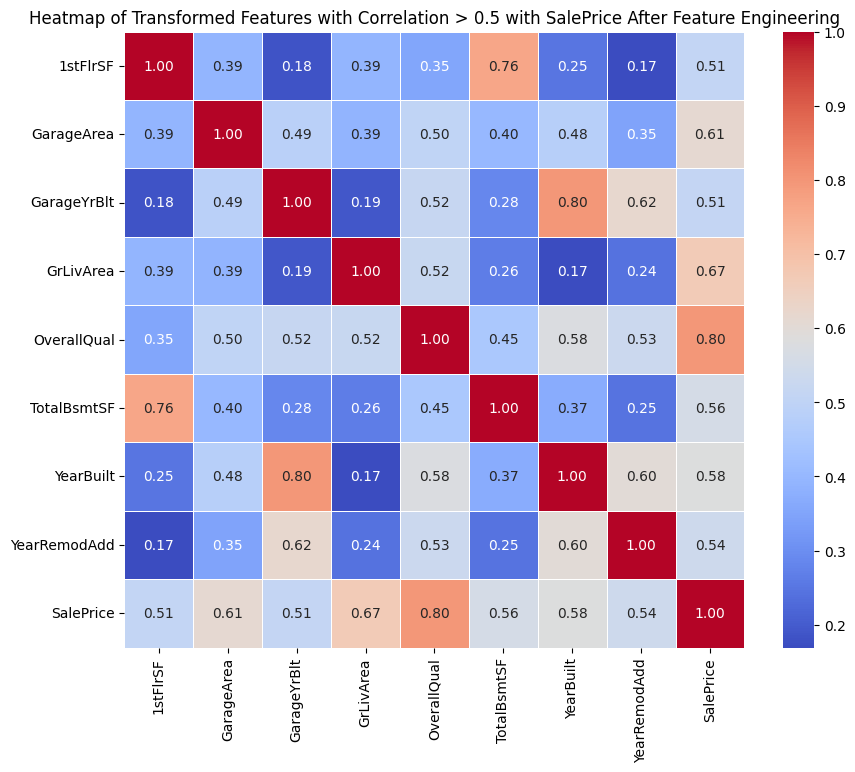

In [83]:
# Filter variables with correlation > 0.5 with SalePrice
threshold = 0.5
high_corr = correlation_matrix_after['SalePrice'][abs(correlation_matrix_after['SalePrice']) > threshold]

# Get the names of relevant variables
relevant_vars = high_corr.index

# Create a filtered correlation matrix with only these variables
filtered_corr_matrix = correlation_matrix_after.loc[relevant_vars, relevant_vars]

# Plot heatmap for variables with high correlation
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap of Transformed Features with Correlation > 0.5 with SalePrice After Feature Engineering")
plt.show()

**Correlation Matrix After Feature Engineering**

The updated correlation matrix shows that feature engineering did not change the correlations between the features and the target variable **SalePrice**.

* **OverallQual (0.80)** This feature has the strongest positive correlation with SalePrice, indicating that higher-quality homes tend to sell for more. This makes it a key predictor for the model.

* **GrLivArea (0.67)** and **GarageArea (0.61)** Both still show strong positive correlations with SalePrice, showing they are important for predicting house prices.

The feature engineering process aimed to explore new predictors and reduce redundancy, but the existing features remain the most significant contributors to the model. By focusing on strongly correlated features like OverallQual, GrLivArea, and GarageArea, the model can effectively predict house prices while avoiding the inclusion of less impactful features.

___

In [76]:
# Filter high correlation features related to SalePrice
high_corr_with_target = correlation_matrix['SalePrice'][correlation_matrix['SalePrice'] >= threshold]
print("Features with high correlation to SalePrice:", high_corr_with_target)

Features with high correlation to SalePrice: 1stFlrSF        0.507141
GarageArea      0.611429
GarageYrBlt     0.512484
GrLivArea       0.666410
OverallQual     0.796281
TotalBsmtSF     0.558263
YearBuilt       0.581749
YearRemodAdd    0.537774
SalePrice       1.000000
Name: SalePrice, dtype: float64


### Hypothesis 1 Confirmed
The scatter plots and correlation analysis show a positive relationship between the total area of the house and its sale price, confirming the initial hypothesis that bigger houses tend to have higher sale prices.

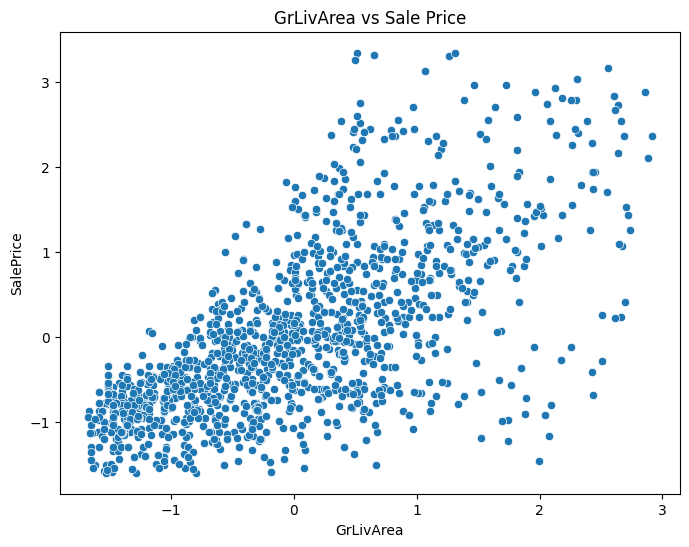

In [77]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df)
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.title('GrLivArea vs Sale Price')
plt.show()

### Hypothesis 2 Confirmed
* The scatter plot and correlation analysis show a strong positive link between OverallQual and SalePrice. With a correlation of 0.80, higher quality homes tend to sell for more. This confirms that home quality affects its sale price.

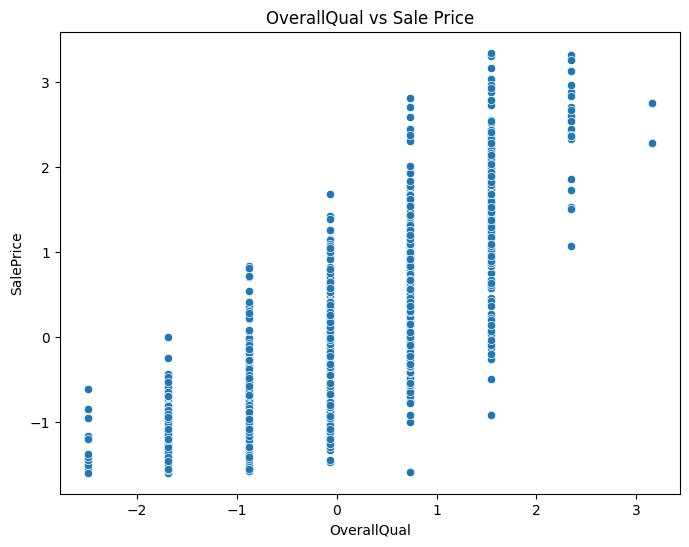

In [78]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='OverallQual', y='SalePrice', data=df)
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.title('OverallQual vs Sale Price')
plt.show()

### Hypothesis 3 Confirmed
The scatter plot and correlation analysis show a positive relationship between 'GarageArea' and 'SalePrice'. This confirms the hypothesis that houses with bigger garages tend to sell for higher prices.

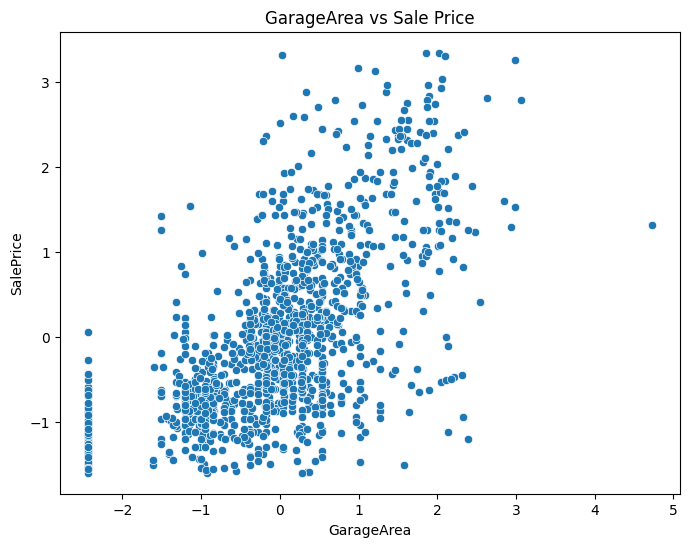

In [79]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='GarageArea', y='SalePrice', data=df)
plt.xlabel('GarageArea')
plt.ylabel('SalePrice')
plt.title('GarageArea vs Sale Price')
plt.show()

In [80]:
print(X_combined.dtypes)

2ndFlrSF            float64
BedroomAbvGr        float64
BsmtFinSF1          float64
GarageArea          float64
GrLivArea           float64
OverallQual         float64
BsmtExposure_Av       int64
BsmtExposure_Gd       int64
BsmtExposure_Mn       int64
BsmtExposure_No       int64
BsmtFinType1_ALQ      int64
BsmtFinType1_BLQ      int64
BsmtFinType1_GLQ      int64
BsmtFinType1_LwQ      int64
BsmtFinType1_Rec      int64
BsmtFinType1_Unf      int64
GarageFinish_Fin      int64
GarageFinish_RFn      int64
GarageFinish_Unf      int64
KitchenQual_Ex        int64
KitchenQual_Fa        int64
KitchenQual_Gd        int64
KitchenQual_TA        int64
SalePrice           float64
dtype: object


Print the number of unique values in each column

In [81]:
print(df.nunique())
print(df['SalePrice'].unique())

1stFlrSF        675
2ndFlrSF        360
BedroomAbvGr      7
BsmtExposure      4
BsmtFinSF1      574
BsmtFinType1      6
BsmtUnfSF       729
GarageArea      403
GarageFinish      3
GarageYrBlt      96
GrLivArea       766
KitchenQual       4
LotArea         683
LotFrontage     103
MasVnrArea      290
OpenPorchSF     182
OverallCond       8
OverallQual       8
TotalBsmtSF     650
YearBuilt       109
YearRemodAdd     61
SalePrice       569
dtype: int64
[ 5.53333604e-01  9.42699531e-02  8.08368966e-01 -6.11327881e-01
  1.25893144e+00 -5.60320809e-01  2.22806581e+00  4.08813566e-01
 -7.83051691e-01 -9.85379745e-01 -7.89852634e-01  2.87415540e+00
 -5.43318451e-01  1.76050098e+00 -3.22287804e-01 -7.47346741e-01
 -4.58306664e-01 -1.46144575e+00 -2.88283089e-01 -6.28330238e-01
  2.53920895e+00 -6.21529295e-01  9.18884289e-01 -3.73294877e-01
  1.36604629e+00 -6.99740140e-01  2.21106346e+00  5.36331247e-01
 -4.52355839e-01  6.70661812e-02 -1.77767766e-01  1.72649627e+00
  2.26207053e+00 -5.2631609

___

In [82]:
# Calculate the correlation between features and SalePrice
correlation = X_combined.corr()['SalePrice'].sort_values(ascending=False)

# Select features that have a strong correlation
selected_features = correlation[abs(correlation) > 0.4].index.tolist()

# Remove 'SalePrice' from the features
selected_features.remove('SalePrice')

print(selected_features)

# Filter the dataset to only keep the selected features and SalePrice
X_selected = X_combined[selected_features + ['SalePrice']]


['OverallQual', 'GrLivArea', 'GarageArea', 'KitchenQual_Gd', 'BsmtFinType1_GLQ', 'GarageFinish_Unf', 'KitchenQual_TA']


## Push files to repo

In [111]:
X_selected.to_csv("outputs/datasets/collection/HousePricesFeaturesSelected.csv", index=False)
print("Exported the transformed dataset successfully!")

Exported the transformed dataset successfully!


### Feature Engineering Summary

* In this notebook new features like TotalSquareFootage and HouseAge to improve predictions was created. 
* Before adding new features, GrLivArea and OverallQual had the highest correlation with SalePrice. After adding TotalSquareFootage and HouseAge, both showed strong relationships with SalePrice, helping improve model predictions.
* Visualizations confirmed their impact on SalePrice. 
* Features were normalized, one-hot encoded, and checked for missing values. 
* Hypothesis 1, 2 and 3 were confirmed. Noted in README.
* Final dataset is ready for modeling.